In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 

### Load Dataset

In [19]:
df = pd.read_excel('homeprices.xlsx')
df.head()

,area,bedrooms,age,price
0,1180,3,21,221900
1,2170,3,63,538000
2,770,2,54,180000
3,1050,4,63,604000
4,1680,3,63,510000


## EDA

In [10]:
df.bedrooms.median()


3.0

In [11]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,1180,3,21,221900
1,2170,3,63,538000
2,770,2,54,180000
3,1050,4,63,604000
4,1680,3,63,510000
...,...,...,...,...
21608,1530,3,24,360000
21609,2310,4,24,400000
21610,1020,2,21,402101
21611,1600,3,24,400000


In [20]:
rows, col = df.shape
print('Rows: ', rows, '\nColumns: ', col)
print('Size: ',df.size)

Rows:  21613 
Columns:  4
Size:  86452


In [21]:
df.nunique()


area         946
bedrooms      13
age           14
price       4028
dtype: int64

In [22]:
df.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [24]:
corr = df.corr()
corr

,area,bedrooms,age,price
area,1.000000,0.477600,0.725680,0.605567
bedrooms,0.477600,1.000000,0.342162,0.308350
age,0.725680,0.342162,1.000000,0.640704
price,0.605567,0.308350,0.640704,1.000000


<AxesSubplot:>

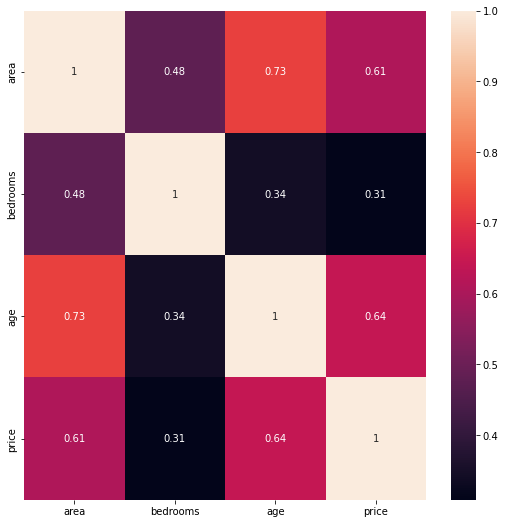

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True)

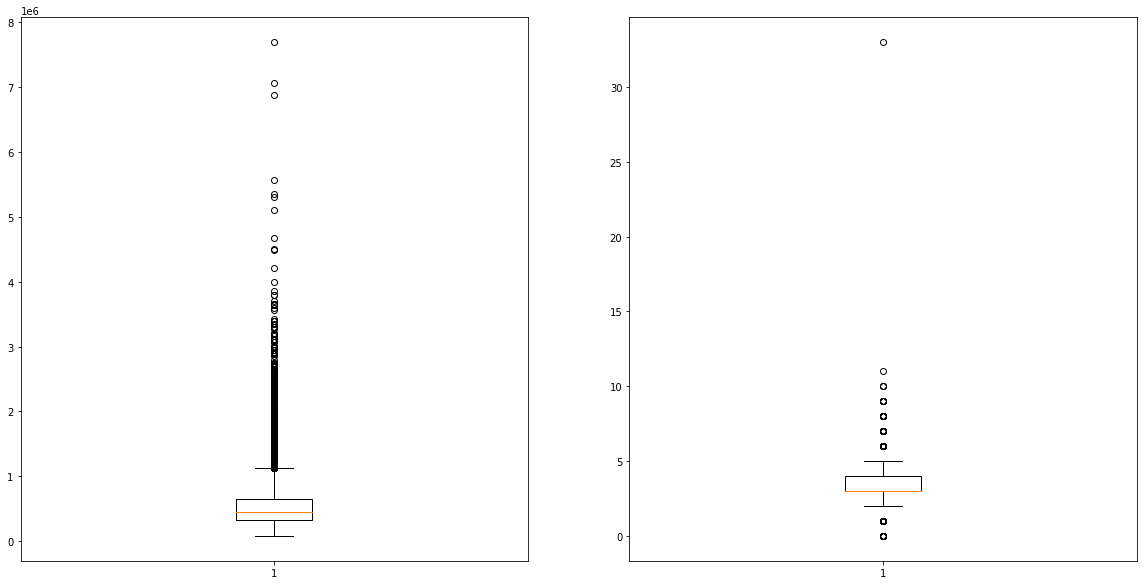

In [29]:
color = sns.color_palette()
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.boxplot(df['price'])
plt.subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

In [33]:
px.line(df, df['price'],df['bedrooms'], color='price')

In [34]:
px.scatter(df, df['price'], df['area'], color='price')

## Model

In [52]:
X=df.iloc[0:, 0:2]
X

,area,bedrooms
0,1180,3
1,2170,3
2,770,2
3,1050,4
4,1680,3
...,...,...
21608,1530,3
21609,2310,4
21610,1020,2
21611,1600,3


In [53]:

X 
y = df[['price']]
X.head()

,area,bedrooms
0,1180,3
1,2170,3
2,770,2
3,1050,4
4,1680,3


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X Train: ', x_train.shape)
print('X test: ', x_test.shape)
print('y Train: ', y_train.shape)
print('y Test: ', x_test.shape)

X Train:  (17290, 2)
X test:  (4323, 2)
y Train:  (17290, 1)
y Test:  (4323, 2)


In [35]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [13]:
reg.coef_

array([  125.85023289, 10745.11228158, 42631.568355  ])

In [14]:
reg.intercept_

-701605.0922688324

In [15]:
reg.predict([[3000, 3, 40]])


c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1413443.67744605])

In [16]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384


498408.25157402386

In [17]:
reg.predict([[2500, 4, 5]])


c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-130841.21914239])

In [62]:
print('Accuracy on training data: ', df.score(x_train, y_train) * 100)
print('Accuracy on testing data: ', df.score(x_test, y_test) * 100)

AttributeError: 'DataFrame' object has no attribute 'score'